In [5]:
from ocr_core import detect_and_log_layouts, PAGE_LIMIT
import re
from PIL import Image, ImageDraw
import pdfplumber

In [6]:
example_path="/workspace/.gen/PDF_Parsing/pp_yoloe/pdf_examples/세로형PDF_(20240603) 금융시장 브리프.pdf"
start_page=10
end_page=15

In [7]:
extracted_txt=[]
full_text = ""
final_res=[]
def file_ocr(file_path: str, start_page: int, end_page: int):
    layouts=detect_and_log_layouts(file_path, start_page, end_page)
    rere=re.compile("\(recording.{0,100}?\)")
    global extracted_txt
    global full_text
    global final_res
    extracted_txt.clear()
    full_text=""
    final_res.clear()
    collection_record_list=[]
    # resres={"page_num":"","detection_res":[]}
    
    for idx,l in enumerate(layouts):
        # res={'page_num':idx,'context':""}
        # with open("./text.txt", "a") as f:
        #     f.write(f"{l.records}\n{l.recovery}\n\n")
        # resres["page_num"]=l.page_number
        resres={"page_num":l.page_number,"detection_res":[]}
        for l_idx,(layout_type,record_list) in enumerate(l.records.items()):
            collection_record_list.append(record_list)
            for rec_idx,record_res in enumerate(record_list):
                res={"layout_type":layout_type.value[1],"text":"","bbox":[],"box_color":layout_type.value[2]}
                for detection in record_res["detections"]:
                    res["text"]+=detection["text"].replace("�","").replace("Ÿ","")
                    res["bbox"].append(list(detection["bbox_converted"]))     
                    
                resres["detection_res"].append(res)
        final_res.append(resres)

        txt= re.sub(rere,"",str(l.recovery)).replace("�","")
        # txt=txt.replace("res","")
        # res['context']=txt
        extracted_txt.append(txt)
    for idx2,l2 in enumerate(layouts):
        txt= re.sub(rere,"",str(l2.recovery)).replace("�","").replace("Ÿ","")
        if "##" not in txt: 
            txt=txt.replace("\n","")
        full_text += f"---- Page {idx2+1} ----\n" + txt + "\n\n"

    for fr in final_res:
        text_text = ""
        for dr in fr["detection_res"]:
            if dr["layout_type"]=="text":
                text_text += dr['text']

        for dr in fr["detection_res"]:
            if dr['layout_type'] == 'table':
                dr['text'] += "\n\n" + text_text
    print("done")

In [8]:
from queue import SimpleQueue
from typing import Any
from threading import Thread
# log_queue: SimpleQueue[Any] = SimpleQueue()
handle = Thread(target=file_ocr, args=[str(example_path), start_page, end_page])
handle.start()

10 15
4
page_number 10


[2024-08-07 10:21:14,032] [ WARNING] ocr_core.py:104 - Invalid layout type header


page_number 11


[2024-08-07 10:21:38,960] [ WARNING] ocr_core.py:104 - Invalid layout type header
[2024-08-07 10:21:40,621] [ WARNING] ocr_core.py:104 - Invalid layout type header


page_number 12


[2024-08-07 10:21:54,022] [ WARNING] ocr_core.py:104 - Invalid layout type header
[2024-08-07 10:21:54,846] [ WARNING] ocr_core.py:104 - Invalid layout type header


page_number 13


[2024-08-07 10:22:02,423] [ WARNING] ocr_core.py:104 - Invalid layout type header


done


In [9]:
final_res

[{'page_num': 10,
  'detection_res': [{'layout_type': 'unknown',
    'text': '금융시장 브리프',
    'bbox': [[462.17785843920143,
      60.816859221223794,
      533.8082274652147,
      70.533162173727]],
    'box_color': (128, 0, 128)},
   {'layout_type': 'text',
    'text': '- ‘3개월 이상의 데이터를 더 확인한 이후 금리인하 여부를 판단할 것’이라는 연준(월러\n연준 이사)의 스탠스는 인플레이션이 아직 판단과 예측이 불충분하며, ‘3개월 이상’\n증시를 억누르는 불확실성으로 작용하며 KOSPI를 박스권에 가두는 요인\n- 반면, 이익 모멘텀을 회복한 미국 증시의 사상 최고치 경신, 미국 빅테크와 한국\n반도체 기업들의 양호한 실적, 사상 최고치에 근접한 수출물가지수, 밸류업\n프로그램의 후속 대책 등은 KOSPI 2,700 이하에서 상승을 견인하는 긍정적 요인\n* 밸류업인덱스출시전금융주로대표되는수혜주의사전적수요,이익추정치가지속\n상향조정되고주주환원의지가강한자동차·기계업종,AI반도체빅테크대장주,중국\n한한령해제기대감과외국인관광객증가수혜주인화장품·음식료·게임·엔터등상승\n모멘텀이지속될섹터에주목\n* KOSPI지수전망(기말,pt):24.4월2,692→5월2,637→6월F2,760\n수출증가율Vs.KOSPI상승률\nS&P500분기별EPS증감율',
    'bbox': [[110.14519056261342,
      114.79632006846384,
      523.0096793708409,
      323.8767650834403]],
    'box_color': (0, 255, 0)},
   {'layout_type': 'figure_caption',
    'text': '자료: Bloomberg, 우리금융경영연구소',
    'bbox': [

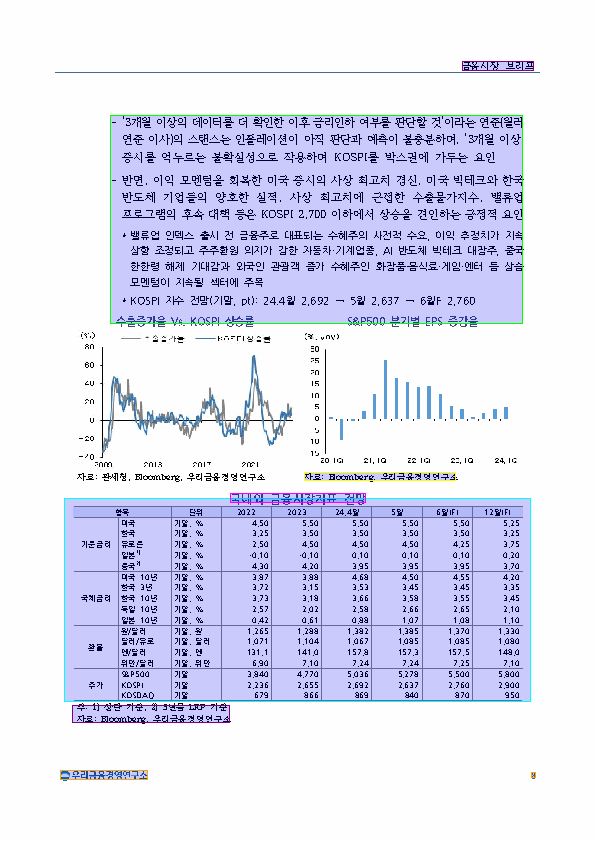

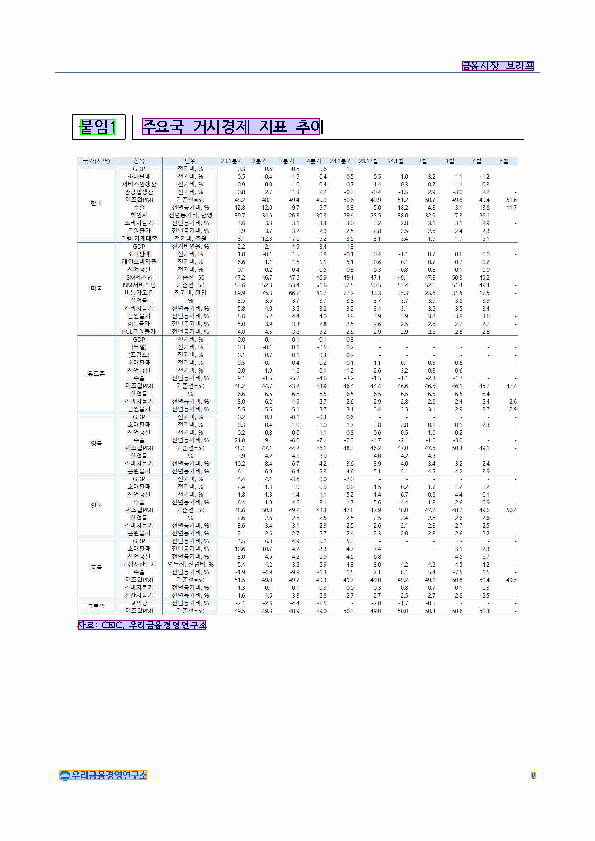

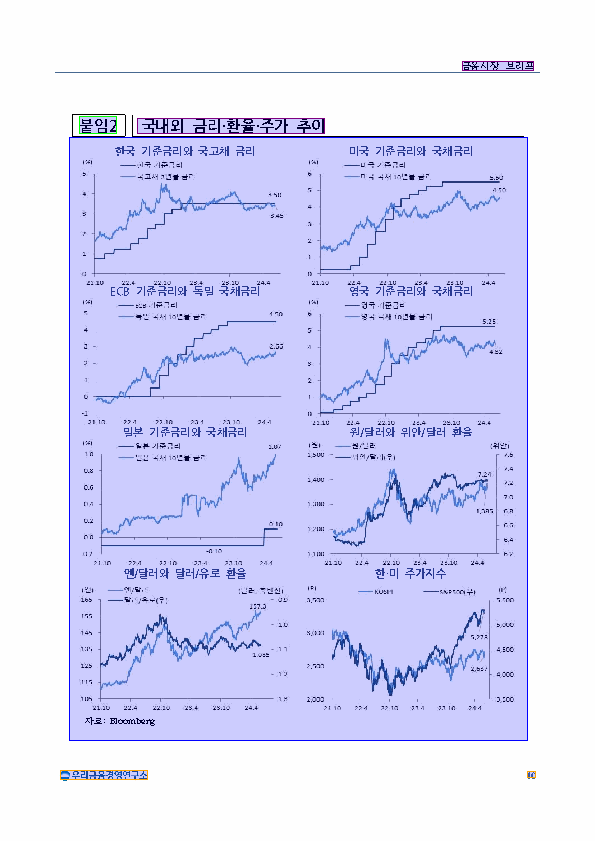

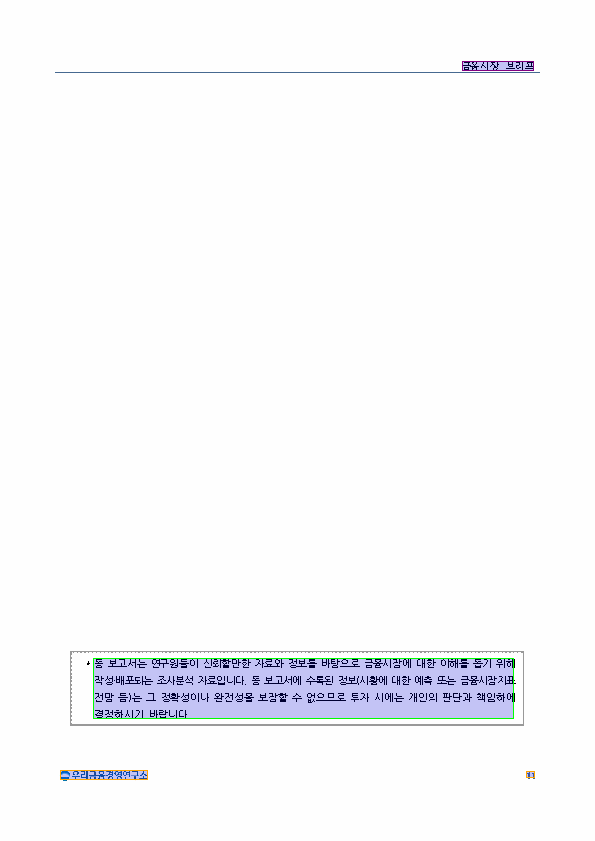

In [10]:
int_list = list(range(8, 11))
with pdfplumber.open(example_path) as pdf:
    for page_num, page in enumerate(pdf.pages):
        for fr in final_res:
            # print(fr)
            if page_num+1==fr["page_num"]:
                im = page.to_image()
                for i in fr["detection_res"]:
                    im.draw_rect(i["bbox"][0], stroke=i["box_color"], stroke_width=1)
                display(im)

# OCR.PY

In [6]:
"""ocr.py version
from ocr import detect_and_log_layouts, PAGE_LIMIT
import re
from PIL import Image, ImageDraw
import pdfplumber
extracted_txt=[]
full_text = ""
final_res=[]
def file_ocr(log_queue: SimpleQueue[Any], file_path: str, start_page: int, end_page: int):
    layouts=detect_and_log_layouts(log_queue, file_path, start_page, end_page)
    rere=re.compile("\(recording.{0,100}?\)")
    global extracted_txt
    global full_text
    global final_res
    extracted_txt.clear()
    full_text=""
    final_res.clear()
    collection_record_list=[]
    # resres={"page_num":"","detection_res":[]}
    
    for idx,l in enumerate(layouts):
        # res={'page_num':idx,'context':""}
        # with open("./text.txt", "a") as f:
        #     f.write(f"{l.records}\n{l.recovery}\n\n")
        # resres["page_num"]=l.page_number
        resres={"page_num":l.page_number,"detection_res":[]}
        for l_idx,(layout_type,record_list) in enumerate(l.records.items()):
            collection_record_list.append(record_list)
            for rec_idx,record_res in enumerate(record_list):
                res={"layout_type":layout_type.value[1],"text":"","bbox":[],"box_color":layout_type.value[2]}
                for detection in record_res["detections"]:
                    res["text"]+=detection["text"].replace("�","").replace("Ÿ","")
                    res["bbox"].append(list(detection["bbox_converted"]))     
                    
                resres["detection_res"].append(res)
        final_res.append(resres)

        txt= re.sub(rere,"",str(l.recovery)).replace("�","")
        # txt=txt.replace("res","")
        # res['context']=txt
        extracted_txt.append(txt)
    for idx2,l2 in enumerate(layouts):
        txt= re.sub(rere,"",str(l2.recovery)).replace("�","").replace("Ÿ","")
        if "##" not in txt: 
            txt=txt.replace("\n","")
        full_text += f"---- Page {idx2+1} ----\n" + txt + "\n\n"

    for fr in final_res:
        text_text = ""
        for dr in fr["detection_res"]:
            if dr["layout_type"]=="text":
                text_text += dr['text']

        for dr in fr["detection_res"]:
            if dr['layout_type'] == 'table':
                dr['text'] += "\n\n" + text_text

    
    log_queue.put("done")
from queue import SimpleQueue
from typing import Any
from threading import Thread
log_queue: SimpleQueue[Any] = SimpleQueue()
handle = Thread(target=file_ocr, args=[log_queue, str(example_path), start_page, end_page])
handle.start()
"""

'ocr.py version\nfrom ocr import detect_and_log_layouts, PAGE_LIMIT\nimport re\nfrom PIL import Image, ImageDraw\nimport pdfplumber\nextracted_txt=[]\nfull_text = ""\nfinal_res=[]\ndef file_ocr(log_queue: SimpleQueue[Any], file_path: str, start_page: int, end_page: int):\n    layouts=detect_and_log_layouts(log_queue, file_path, start_page, end_page)\n    rere=re.compile("\\(recording.{0,100}?\\)")\n    global extracted_txt\n    global full_text\n    global final_res\n    extracted_txt.clear()\n    full_text=""\n    final_res.clear()\n    collection_record_list=[]\n    # resres={"page_num":"","detection_res":[]}\n    \n    for idx,l in enumerate(layouts):\n        # res={\'page_num\':idx,\'context\':""}\n        # with open("./text.txt", "a") as f:\n        #     f.write(f"{l.records}\n{l.recovery}\n\n")\n        # resres["page_num"]=l.page_number\n        resres={"page_num":l.page_number,"detection_res":[]}\n        for l_idx,(layout_type,record_list) in enumerate(l.records.items()):\n

In [22]:
while True:
    msg = log_queue.get()
    if msg == "done":
        break

    msg_type = msg[0]
    if msg_type == "blueprint":
        blueprint = msg[1]
        print(blueprint)